## Results

In [10]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df_results = pd.read_csv("./data/clusters_results.csv")
df_results

,country,Cluster_kmeans,Cluster_AggClu,Cluster_dbscan,Cluster_GM
0,Afghanistan,1,2,-1,2
1,Albania,2,1,0,0
2,Algeria,2,1,0,0
3,Angola,1,1,-1,2
4,Antigua and Barbuda,2,1,0,0
...,...,...,...,...,...
162,Vanuatu,2,1,-1,2
163,Venezuela,2,1,0,0
164,Vietnam,2,1,-1,2
165,Yemen,1,1,-1,2


In [16]:
for cluster_id in df_results['Cluster_GM'].unique():
    cluster_countries = df_results[df_results['Cluster_GM'] == cluster_id].country.tolist()
    print(f"Cluster {cluster_id}:")
    print(cluster_countries)
    print()

Cluster 2:
['Afghanistan', 'Angola', 'Azerbaijan', 'Bangladesh', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Rep.', 'Chad', 'Comoros', 'Dem. Rep. Congo', 'Congo', "Côte d'Ivoire", 'Eq. Guinea', 'Eritrea', 'Fiji', 'Gabon', 'Gambia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'India', 'Iraq', 'Jordan', 'Kenya', 'Kiribati', 'Kyrgyzstan', 'Laos', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Philippines', 'Rwanda', 'Samoa', 'Senegal', 'Sierra Leone', 'Solomon Is.', 'South Africa', 'Sri Lanka', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Tonga', 'Turkmenistan', 'Uganda', 'Uzbekistan', 'Vanuatu', 'Vietnam', 'Yemen', 'Zambia']

Cluster 0:
['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Bahamas', 'Barbados', 'Be

C:\Users\Carlos Andres Cortes\AppData\Local\Temp\ipykernel_7932\2433245985.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


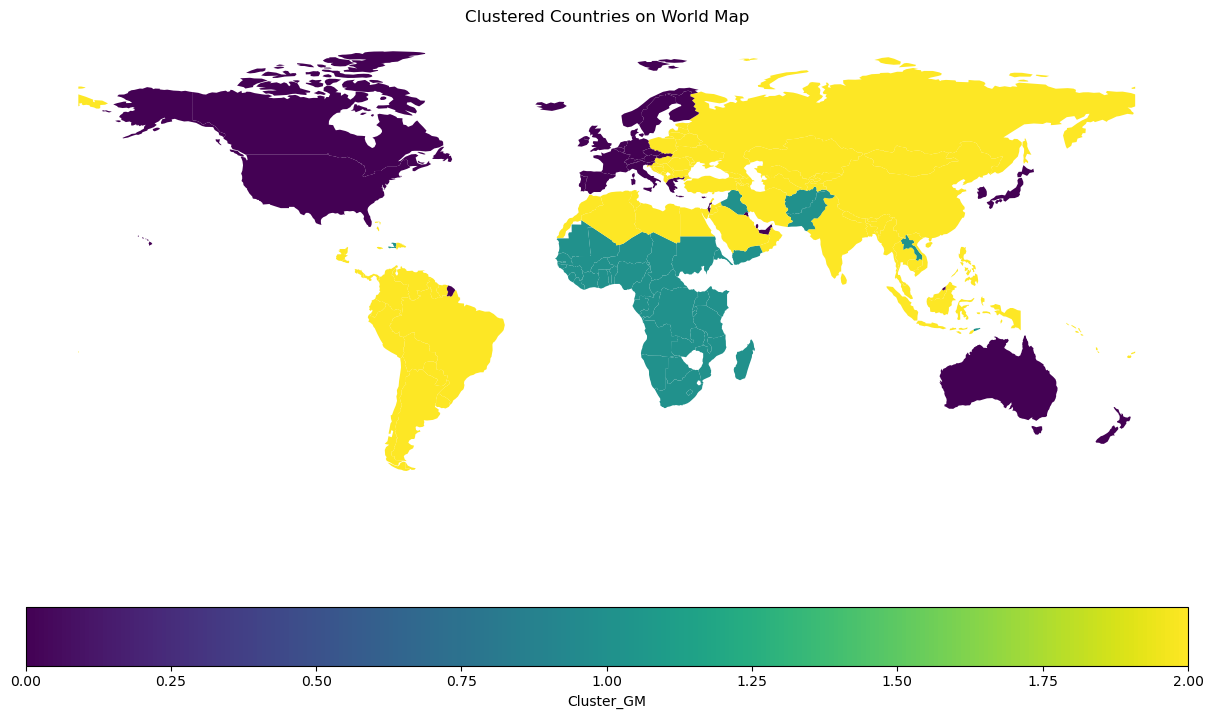

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming df_clustered_dbscan is your DataFrame with clustering information

# Load world map dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge world map data with clustering information
world = world.merge(df_results, left_on='name', right_on='country')

# Plot choropleth map with cluster colors
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='Cluster_kmeans', ax=ax, legend=True, cmap='viridis', 
           legend_kwds={'label': 'Cluster_GM', 'orientation': 'horizontal'})
ax.set_title('Clustered Countries on World Map')
ax.set_axis_off()  # Turn off axis
plt.show()
